# Gravitational waves in general relativity XV : The loss - free case - Bondi
##  Geoff Cope
##  Univeristy of Utah
##  December 22, 2021

We calcuate tensors for metric 2.1 in the case when epsilon is not zero.  We then reduce down to the special case of epsilon equals zero

https://royalsocietypublishing.org/doi/abs/10.1098/rspa.2000.0630

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
t,r,theta,z,dt,dr,dtheta,dz = symbols( 't r theta z dt dr dtheta dz' ) 

In [4]:
epsilon,phi,Lambda,mu = symbols('epsilon phi Lambda mu')

In [5]:
phi = Function('phi')(r,theta)
phi

In [6]:
mu = Function('mu')(r,theta)
mu

In [7]:
Lambda = Function('Lambda')(r,theta)
Lambda

In [8]:
variables = Matrix( [t,r,theta,z] )
variables

⎡t⎤
⎢ ⎥
⎢r⎥
⎢ ⎥
⎢θ⎥
⎢ ⎥
⎣z⎦

In [9]:
differentials = Matrix( [dt,dr,dtheta,dz] ) 
differentials

⎡  dt  ⎤
⎢      ⎥
⎢  dr  ⎥
⎢      ⎥
⎢dtheta⎥
⎢      ⎥
⎣  dz  ⎦

In [10]:
lineElement = expand((1-epsilon**2)*exp(2*phi)*dt**2 + 2*epsilon*r*exp(phi+Lambda)*dt*dtheta - exp(2*mu)*dz**2 - exp(2*Lambda)*(dr**2 + r**2 * dtheta**2))
lineElement

In [11]:
lineElement.subs(epsilon,0)

In [12]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡   2  2⋅φ(r, θ)    2⋅φ(r, θ)                    Λ(r, θ)  φ(r, θ)             ⎤
⎢- ε ⋅ℯ          + ℯ                0       ε⋅r⋅ℯ       ⋅ℯ              0     ⎥
⎢                                                                             ⎥
⎢                                2⋅Λ(r, θ)                                    ⎥
⎢             0                -ℯ                     0                 0     ⎥
⎢                                                                             ⎥
⎢        Λ(r, θ)  φ(r, θ)                        2  2⋅Λ(r, θ)                 ⎥
⎢   ε⋅r⋅ℯ       ⋅ℯ                  0          -r ⋅ℯ                    0     ⎥
⎢                                                                             ⎥
⎢                                                                    2⋅μ(r, θ)⎥
⎣             0                     0                 0            -ℯ         ⎦

In [13]:
g.subs(epsilon,0)

⎡ 2⋅φ(r, θ)                                          ⎤
⎢ℯ                0             0              0     ⎥
⎢                                                    ⎥
⎢              2⋅Λ(r, θ)                             ⎥
⎢    0       -ℯ                 0              0     ⎥
⎢                                                    ⎥
⎢                           2  2⋅Λ(r, θ)             ⎥
⎢    0            0       -r ⋅ℯ                0     ⎥
⎢                                                    ⎥
⎢                                           2⋅μ(r, θ)⎥
⎣    0            0             0         -ℯ         ⎦

In [14]:
import sympy

In [15]:
m = sympy.Array(g)
m

⎡   2  2⋅φ(r, θ)    2⋅φ(r, θ)                    Λ(r, θ)  φ(r, θ)             ⎤
⎢- ε ⋅ℯ          + ℯ                0       ε⋅r⋅ℯ       ⋅ℯ              0     ⎥
⎢                                                                             ⎥
⎢                                2⋅Λ(r, θ)                                    ⎥
⎢             0                -ℯ                     0                 0     ⎥
⎢                                                                             ⎥
⎢        Λ(r, θ)  φ(r, θ)                        2  2⋅Λ(r, θ)                 ⎥
⎢   ε⋅r⋅ℯ       ⋅ℯ                  0          -r ⋅ℯ                    0     ⎥
⎢                                                                             ⎥
⎢                                                                    2⋅μ(r, θ)⎥
⎣             0                     0                 0            -ℯ         ⎦

In [16]:
m.subs(epsilon,0)

⎡ 2⋅φ(r, θ)                                          ⎤
⎢ℯ                0             0              0     ⎥
⎢                                                    ⎥
⎢              2⋅Λ(r, θ)                             ⎥
⎢    0       -ℯ                 0              0     ⎥
⎢                                                    ⎥
⎢                           2  2⋅Λ(r, θ)             ⎥
⎢    0            0       -r ⋅ℯ                0     ⎥
⎢                                                    ⎥
⎢                                           2⋅μ(r, θ)⎥
⎣    0            0             0         -ℯ         ⎦

In [17]:
from einsteinpy.symbolic import *

In [18]:
syms = sympy.symbols("t r theta z")
t,r,theta,z = syms

In [19]:
metric = MetricTensor(m,syms)

In [20]:
metric.subs(epsilon,0)

Tensor[[exp(2*phi(r, theta)), 0, 0, 0], [0, -exp(2*Lambda(r, theta)), 0, 0], [0, 0, -r**2*exp(2*Lambda(r, theta)), 0], [0, 0, 0, -exp(2*mu(r, theta))]]

In [21]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡                                                                                                                          
⎢                                                                                                                          
⎢⎡      ⎛ 2    ⎞  -Λ(r, θ) + φ(r, θ) ∂                     2 ∂              2 ∂                                            
⎢⎢    ε⋅⎝ε  - 1⎠⋅ℯ                  ⋅──(φ(r, θ))          ε ⋅──(Λ(r, θ))   ε ⋅──(φ(r, θ))     2                            
⎢⎢                                   ∂θ                      ∂r               ∂r             ε    ∂                        
⎢⎢    ──────────────────────────────────────────          ────────────── - ────────────── + ─── + ──(φ(r, θ))              
⎢⎢                        r                                     2                2          2⋅r   ∂r                       
⎢⎢                                                                                                                         
⎢⎢ 2 ∂  

In [22]:
ch.tensor().subs(epsilon,0)

⎡                                                                                                                          
⎢                                                                                                                          
⎢                                                                                                                          
⎢                                                                                                                          
⎢                                                                                                                          
⎢                                            ⎡ -2⋅Λ(r, θ)  2⋅φ(r, θ) ∂                                                     
⎢                                            ⎢ℯ          ⋅ℯ         ⋅──(φ(r, θ))       0                                   
⎢⎡             ∂            ∂             ⎤  ⎢                       ∂r                                                    
⎢⎢     0

In [23]:
Ric = RicciTensor.from_metric(metric)
simplify(Ric.tensor())

⎡⎛                     2                                                      2                                            
⎢⎜   4  2 ⎛∂          ⎞                                     4  2 ⎛∂          ⎞                                             
⎢⎜  ε ⋅r ⋅⎜──(Λ(r, θ))⎟                                    ε ⋅r ⋅⎜──(φ(r, θ))⎟                                             
⎢⎜        ⎝∂r         ⎠     4  2 ∂           ∂                   ⎝∂r         ⎠     4   ∂              4   ∂              4 
⎢⎜- ──────────────────── + ε ⋅r ⋅──(Λ(r, θ))⋅──(φ(r, θ)) - ──────────────────── - ε ⋅r⋅──(Λ(r, θ)) + ε ⋅r⋅──(φ(r, θ)) + ε ⋅
⎢⎜           2                   ∂r          ∂r                     2                  ∂r                 ∂r               
⎢⎝                                                                                                                         
⎢──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
⎢       

In [ ]:
einst = EinsteinTensor.from_metric(metric)
simplify(einst.tensor())

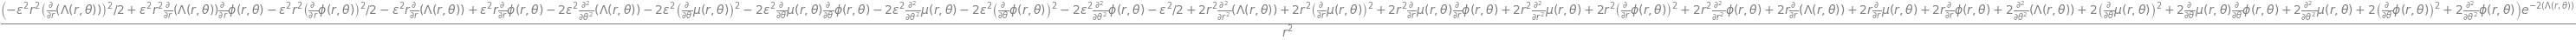

In [38]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

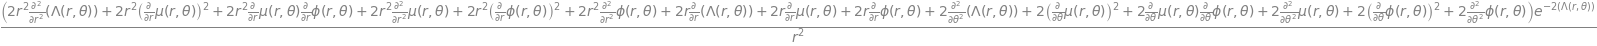

In [40]:
R.expr.subs(epsilon,0)

In [41]:
rm1 = RiemannCurvatureTensor.from_christoffels(ch)
rm1.tensor()

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [42]:
weyl = WeylTensor.from_metric(metric)
weyl.tensor()

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [ ]:
ricciSimplified = simplify(Ric.tensor()).subs(epsilon,0)

In [ ]:
einsteinSimplified = simplify(einst.tensor()).subs(epsilon,0)